## LOADING DATA AND IMPORTIG LIBRARIES

In [1]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib

matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [15]:
df=pd.read_csv('https://raw.githubusercontent.com/charcode123/SUPERSTORE-SALES-PREDICTION/main/DATA/train.csv')

In [16]:
df.dtypes

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code      float64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
dtype: object

In [20]:
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d-%m-%Y')

## BUILDING A PREDICTING MODEL FOR FURNITURES SALES

In [21]:
furniture = df.loc[df['Category'] == 'Furniture']

### QUICK LOOK INTO THE DATA

In [22]:
furniture['Order Date'].min()

Timestamp('2015-01-06 00:00:00')

In [23]:
furniture['Order Date'].max()

Timestamp('2018-12-30 00:00:00')

### DATA PREPROCESSING

In [25]:
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name']
furniture.drop(cols, axis=1, inplace=True)
furniture = furniture.sort_values('Order Date')

In [26]:
furniture.isnull().sum()

Order Date    0
Sales         0
dtype: int64

In [27]:
furniture = furniture.groupby('Order Date')['Sales'].sum().reset_index()

In [28]:
furniture.head()

,Order Date,Sales
0,2015-01-06,2573.820
1,2015-01-07,76.728
2,2015-01-10,51.940
3,2015-01-11,9.940
4,2015-01-13,879.939


### INDEXING WITH TIME SERIES DATA

In [29]:
furniture = furniture.set_index('Order Date')
furniture.index

DatetimeIndex(['2015-01-06', '2015-01-07', '2015-01-10', '2015-01-11',
               '2015-01-13', '2015-01-14', '2015-01-16', '2015-01-19',
               '2015-01-20', '2015-01-26',
               ...
               '2018-12-18', '2018-12-19', '2018-12-21', '2018-12-22',
               '2018-12-23', '2018-12-24', '2018-12-25', '2018-12-28',
               '2018-12-29', '2018-12-30'],
              dtype='datetime64[ns]', name='Order Date', length=877, freq=None)

Our current datetime data can be tricky to work with, therefore, we will use the averages daily sales value for that month instead, and we are using the start of each month as the timestamp.

In [30]:
y = furniture['Sales'].resample('MS').mean()

Have a quick peek 2017 sales data.

In [33]:
y['2017':'31-12-2017']

Order Date
2017-01-01     508.182867
2017-02-01     356.868273
2017-03-01     584.412476
2017-04-01     695.373158
2017-05-01     676.935227
2017-06-01     889.323143
2017-07-01     739.397588
2017-08-01     700.591665
2017-09-01    1114.811454
2017-10-01     621.737316
2017-11-01    1271.345152
2017-12-01    1407.883269
Freq: MS, Name: Sales, dtype: float64

### VISUALIZING FURNITURE SALES TIME SERIES DATA

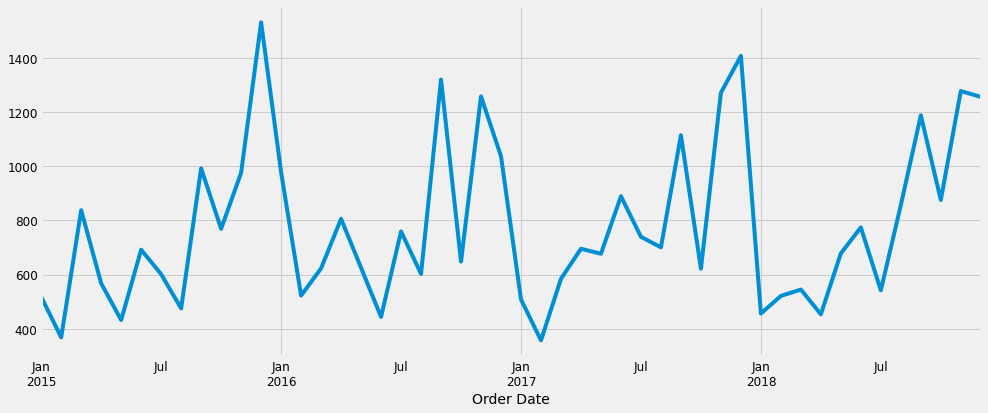

In [34]:
y.plot(figsize=(15, 6))
plt.show()

Some distinguishable patterns appear when we plot the data. The time-series has seasonality pattern, such as sales are always low at the beginning of the year and high at the end of the year. There is always a strong upward trend within any single year with a couple of low months in the mid of the year.

We can also visualize our data using a method called time-series decomposition that allows us to decompose our time series into three distinct components: trend, seasonality, and noise.

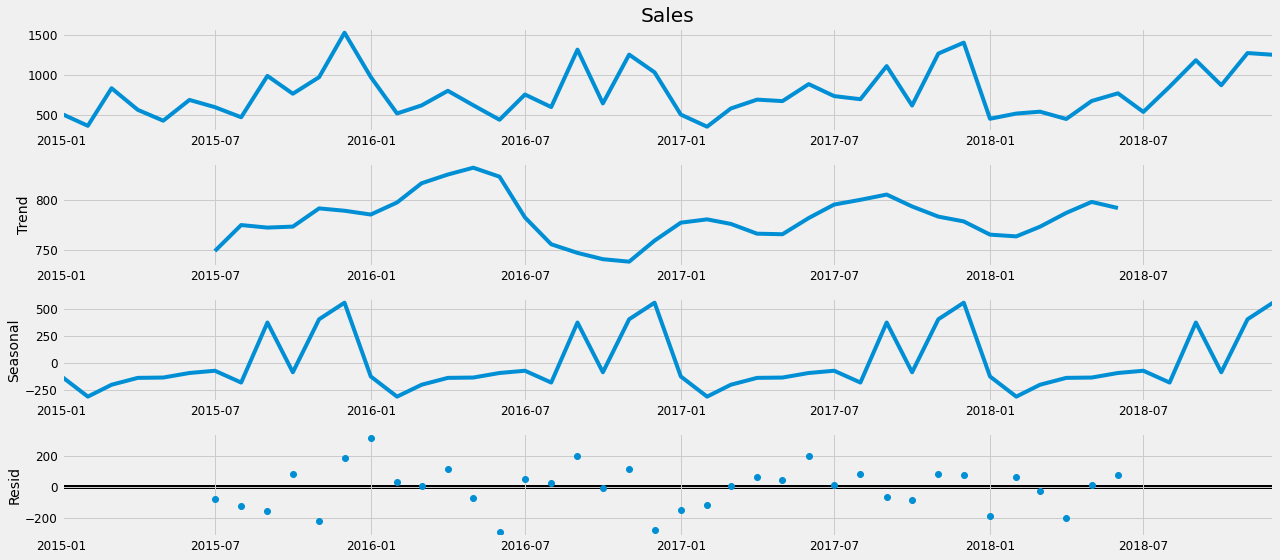

In [35]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()